In [11]:
from google.colab import files
uploaded = files.upload()

Saving hamspam.csv.csv to hamspam.csv.csv


In [36]:
# KNN

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('/content/hamspam.csv.csv')

# Encode categorical columns if any
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])

# Split dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create KNN classifier with k=2
knn = KNeighborsClassifier(n_neighbors=2)

# Fit the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))  # Fixed space issue


Accuracy: 50.50%
Classification Report:
               precision    recall  f1-score   support

         Ham       0.51      0.72      0.60       103
        Spam       0.48      0.28      0.35        97

    accuracy                           0.51       200
   macro avg       0.50      0.50      0.48       200
weighted avg       0.50      0.51      0.48       200



In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('/content/hamspam.csv.csv')

# Assuming the last column is the target and others are features
X = dataset.iloc[:, :-1]  # Features
y = dataset.iloc[:, -1]   # Target

# Encode categorical columns if any
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])

# Split dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Naive Bayes classifier
nb = GaussianNB()

# Fit the model
nb.fit(X_train, y_train)

# Make predictions
y_pred = nb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))  # Fixed non-breaking space


Accuracy: 55.00%
Classification Report:
               precision    recall  f1-score   support

         Ham       0.54      0.80      0.65       103
        Spam       0.57      0.29      0.38        97

    accuracy                           0.55       200
   macro avg       0.56      0.54      0.51       200
weighted avg       0.56      0.55      0.52       200



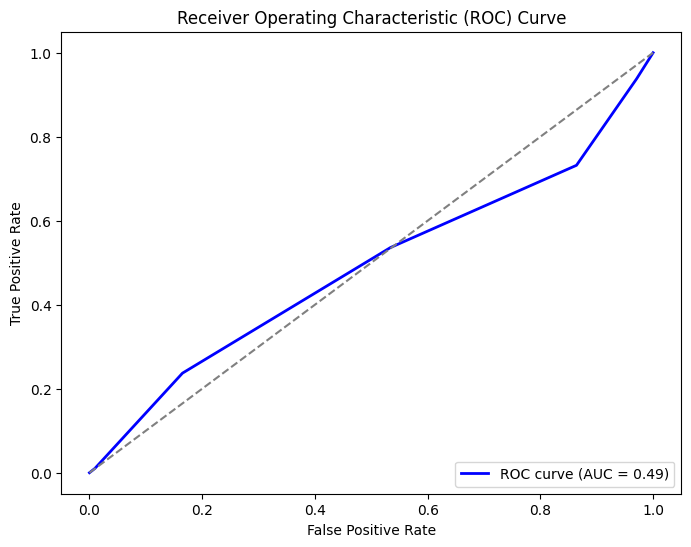

AUC Score: 0.49


In [40]:
#2b

#KNN ROC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder

# Assuming the last column is the target and others are features
X = dataset.iloc[:, :-1]  # Features
y = dataset.iloc[:, -1]   # Target

# Encode categorical columns if any
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])

# Encode target variable if it's categorical
y = le.fit_transform(y) if y.dtype == 'object' else y

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict probabilities
if hasattr(knn, "predict_proba"):
    y_scores = knn.predict_proba(X_test)[:, 1]
else:
    y_scores = knn.predict(X_test)  # Fallback if predict_proba is not available

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print AUC Score
print(f'AUC Score: {roc_auc:.2f}')